In [1]:
import numpy as np

In [2]:
arr=np.array([10,15,17,25,32,18,15])

In [7]:
arr.std()
arr.mean()

18.857142857142858

In [8]:
(arr-arr.mean())/arr.std()

array([-1.3041798 , -0.56794927, -0.27345706,  0.9045118 ,  1.93523454,
       -0.12621095, -0.56794927])

In [17]:
std_arr=np.array([-1.3041798 , -0.56794927, -0.27345706,  0.9045118 ,  1.93523454,
       -0.12621095, -0.56794927])
std_arr.round(1)

array([-1.3, -0.6, -0.3,  0.9,  1.9, -0.1, -0.6])

In [20]:
arr.mean(),std_arr.mean().round(1)

(18.857142857142858, -0.0)

In [21]:
arr.std(),std_arr.std().round(1)

(6.791351042288407, 1.0)

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [23]:
data=pd.read_csv('Social_Network_Ads.csv')

In [24]:
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [27]:
X=data.iloc[:,0:2]
y=data.iloc[:,-1]

In [74]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=25,test_size=0.25)

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
ss=StandardScaler()

In [32]:
ss.fit(X_train)

StandardScaler()

In [33]:
ss.mean_

array([3.74766667e+01, 7.06766667e+04])

In [34]:
X_train_scaled=ss.transform(X_train)
X_test_scaled=ss.transform(X_test)

In [38]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [45]:
X_train_scaled.describe().round(0)
X_train.describe().round(0)

,Age,EstimatedSalary
count,300.0,300.0
mean,37.0,70677.0
std,11.0,34479.0
min,18.0,15000.0
25%,30.0,43750.0
50%,37.0,71000.0
75%,45.0,88000.0
max,60.0,150000.0


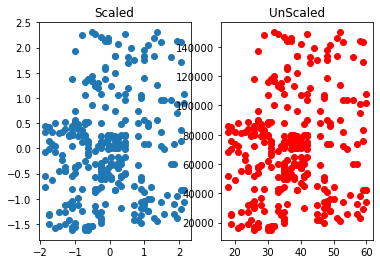

In [70]:
#fig, (ax1,ax2)=plt.subplot(ncols=2,figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'])
plt.title('Scaled')
plt.subplot(1,2,2)
plt.scatter(X_train['Age'],X_train['EstimatedSalary'],color='r')
plt.title('UnScaled')

plt.show()

In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [72]:
knn_scaled=KNeighborsClassifier()
knn_unscaled=KNeighborsClassifier()

In [75]:
knn_unscaled.fit(X_train,y_train)

KNeighborsClassifier()

In [78]:
y_pred_unscaled=knn_unscaled.predict(X_test)

In [79]:
accuracy_score(y_test,y_pred_unscaled)

0.81

In [80]:
knn_scaled.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [82]:
y_pred_scaled=knn_scaled.predict(X_test_scaled)

In [83]:
accuracy_score(y_test,y_pred_scaled)

0.9